In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils.re_referencing import rref_REST

DEBUG:root:test
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
# Params load data
data_folder = "../data/"

metric = "AIS"

# Params Reconstruction
reconst_threshold = None #0.2

# Params Cleaning
clean_threshold = 0.6
window_time_cleaning = 10
rref_fn = rref_REST

# Params AIS
max_lag = 20
cmi_estimator = 'JidtGaussianCMI' #'JidtKraskovCMI' 'OpenCLKraskovCMI' 'JidtGaussianCMI'
local_values = False

if metric.upper() == "AIS":
    folder_name = f"reconstth-{reconst_threshold}_cleanth-{clean_threshold}_windowtimecleaning-{window_time_cleaning}_{rref_fn.__name__}_maxlag-{max_lag}_cmiestimator-{cmi_estimator}".replace(".", "o")
else:
    f"{metric}_reconstth-{reconst_threshold}_cleanth-{clean_threshold}_windowtimecleaning-{window_time_cleaning}_{rref_fn.__name__}_maxlag-{max_lag}_minlag-{min_lag}_cmiestimator-{cmi_estimator}".replace(".", "o")
    
save_folder = os.path.join(
    "../results/", 
    folder_name
)


In [3]:
hc_filenames = list(filter(lambda x: x.startswith("h"), sorted(os.listdir(data_folder))))
sz_filenames = list(filter(lambda x: x.startswith("s"), sorted(os.listdir(data_folder))))

filenames = hc_filenames + sz_filenames[:-3]
filenames

['h01.edf',
 'h02.edf',
 'h03.edf',
 'h04.edf',
 'h05.edf',
 'h06.edf',
 'h07.edf',
 'h08.edf',
 'h09.edf',
 'h10.edf',
 'h11.edf',
 'h12.edf',
 'h13.edf',
 'h14.edf',
 's01.edf',
 's02.edf',
 's03.edf',
 's04.edf',
 's05.edf',
 's06.edf',
 's07.edf',
 's08.edf',
 's09.edf',
 's10.edf',
 's11.edf']

In [4]:
res_ch = {}
for filename in filenames:
    save_subject_folder = filename.split(".edf")[0]
    for i_channel in range(19):#[16, 17, 18]:
        if metric.upper() == "AIS":
            print(f"Loading: {filename}, channel: {i_channel}")
            save_filename = f"ais_ichannel-{i_channel}"
            load_filepath = os.path.join(save_folder, save_subject_folder, save_filename)
        else:
            print(f"Loading: {filename}, target: {i_channel}")
            save_filename = f"te_itarget-{i_channel}"
            load_filepath = os.path.join(save_folder, save_subject_folder, save_filename)
        npz = np.load(f"{load_filepath}.npz")
        if metric.upper() == "AIS":
            res = npz["ais"]
        else:
            res = npz["te"]
        res_ch.setdefault(save_subject_folder, {})
        res_ch[save_subject_folder].setdefault(f"{i_channel}", res)


Loading: h01.edf, channel: 0
Loading: h01.edf, channel: 1
Loading: h01.edf, channel: 2
Loading: h01.edf, channel: 3
Loading: h01.edf, channel: 4
Loading: h01.edf, channel: 5
Loading: h01.edf, channel: 6
Loading: h01.edf, channel: 7
Loading: h01.edf, channel: 8
Loading: h01.edf, channel: 9
Loading: h01.edf, channel: 10
Loading: h01.edf, channel: 11
Loading: h01.edf, channel: 12
Loading: h01.edf, channel: 13
Loading: h01.edf, channel: 14
Loading: h01.edf, channel: 15
Loading: h01.edf, channel: 16
Loading: h01.edf, channel: 17
Loading: h01.edf, channel: 18
Loading: h02.edf, channel: 0
Loading: h02.edf, channel: 1
Loading: h02.edf, channel: 2
Loading: h02.edf, channel: 3
Loading: h02.edf, channel: 4
Loading: h02.edf, channel: 5
Loading: h02.edf, channel: 6
Loading: h02.edf, channel: 7
Loading: h02.edf, channel: 8
Loading: h02.edf, channel: 9
Loading: h02.edf, channel: 10
Loading: h02.edf, channel: 11
Loading: h02.edf, channel: 12
Loading: h02.edf, channel: 13
Loading: h02.edf, channel: 14


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


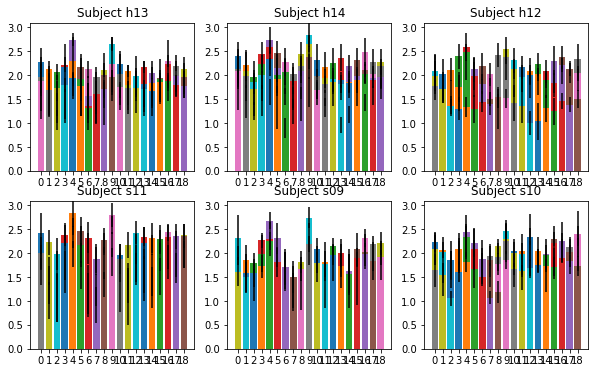

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
for j, (s_key, dict_values) in enumerate(res_ch.items()):
    for i_channel, data in dict_values.items():
        k = 0 if s_key[0] == 'h' else 1
        ax[k, j%3].bar(i_channel, data.mean(), yerr=data.std())
        ax[k, j%3].set_title(f"Subject {s_key}")
        ax[k, j%3].set_ylim(0, 3.1)

In [6]:
res_ch["s07"]

{'0': array([1.98079066, 1.36478442, 2.13768621, 2.47392146, 2.24743737,
        2.1808177 , 2.22854235]),
 '1': array([2.37721315, 1.37490181, 1.95409749, 2.17231311, 2.06315047,
        1.91539049, 2.32916623]),
 '2': array([2.64232622, 1.35240007, 1.92682467, 1.63939255, 1.627294  ,
        1.62706894, 2.1814917 ]),
 '3': array([2.47597614, 1.35601852, 2.27250207, 2.18413178, 1.99475706,
        2.06932304, 2.28441009]),
 '4': array([3.0378524 , 1.36207083, 2.34832743, 2.56346349, 2.33531329,
        2.31699665, 2.41463231]),
 '5': array([1.51251922, 1.35832644, 2.10193329, 2.51985655, 2.21557061,
        2.26605017, 2.62113633]),
 '6': array([1.36144461, 1.36985107, 1.64694422, 2.18607001, 1.98190544,
        2.07702063, 2.52116125]),
 '7': array([1.4137432 , 1.36937757, 1.64825018, 2.27544532, 2.05819123,
        1.99863696, 2.20677263]),
 '8': array([1.49670283, 1.60160083, 1.90835961, 1.9647378 , 1.76749441,
        1.54487658, 2.14793788]),
 '9': array([1.90250396, 1.32097003, 

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans ('/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0 to DejaVu Sans ('/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


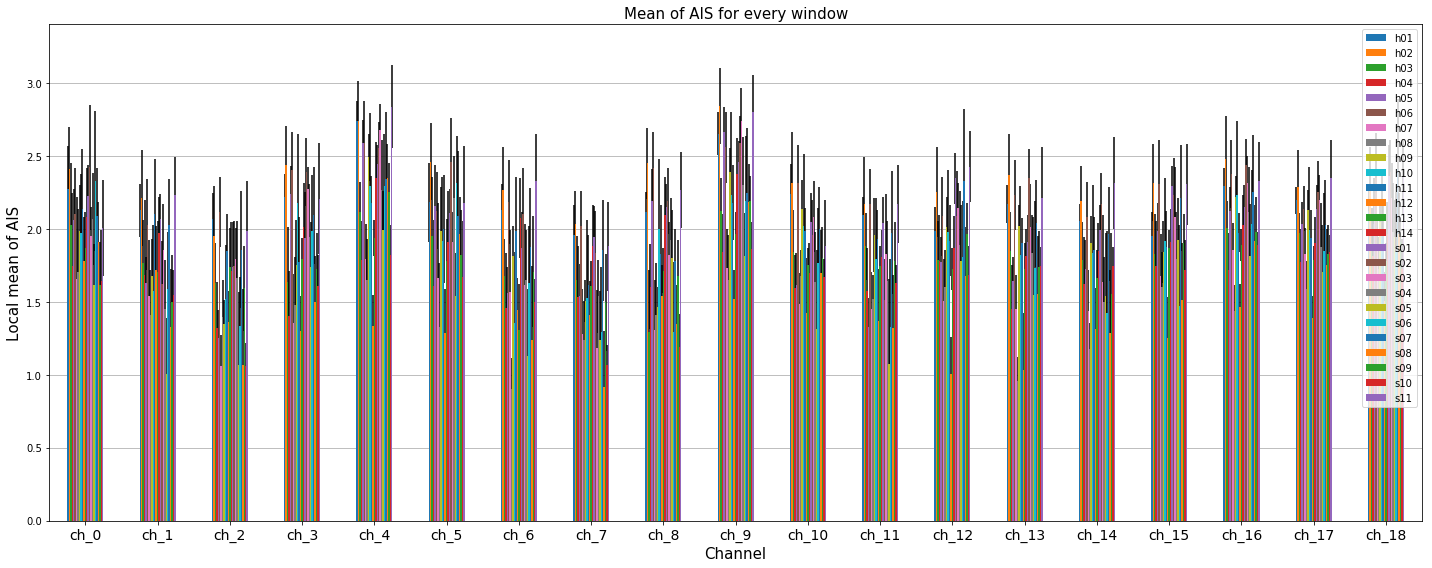

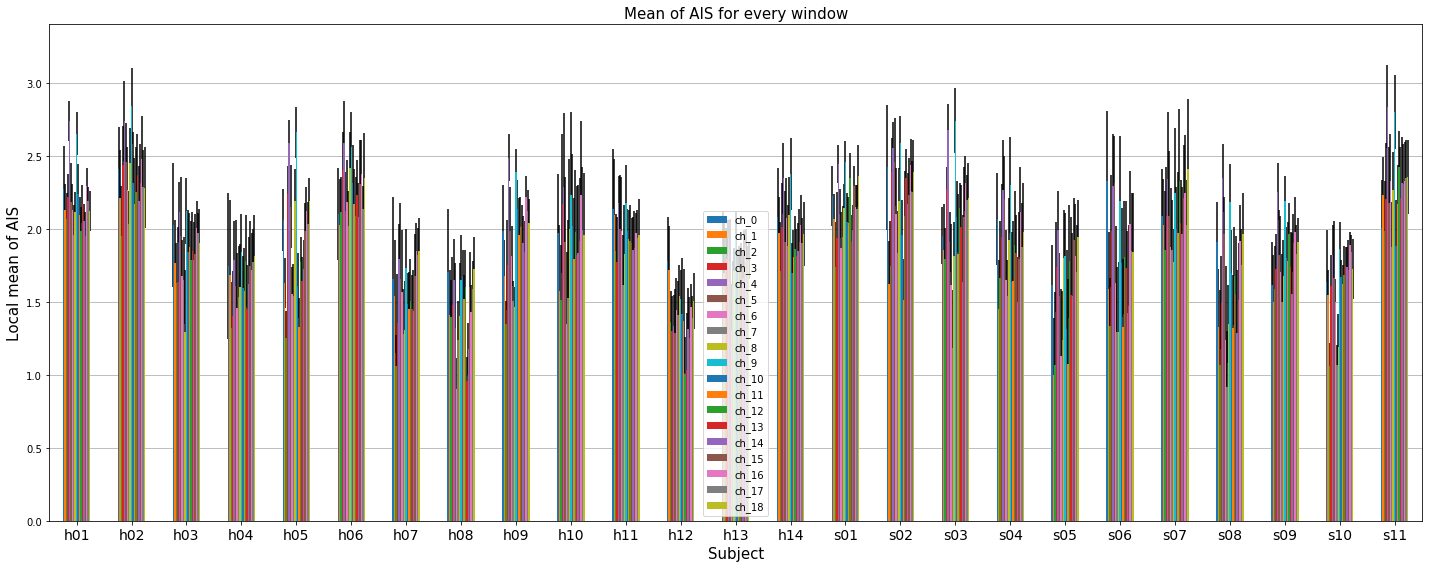

In [7]:
df = pd.DataFrame.from_dict(res_ch)
df.index = df.index.map(lambda x: f"ch_{x}")

df_mean = pd.concat([df[col].apply(lambda row: row.mean()) for col in df.columns], axis=1)
df_std = pd.concat([df[col].apply(lambda row: row.std()) for col in df.columns], axis=1)

fig, ax = plt.subplots(figsize=(20,8))
df_mean.plot(kind="bar", yerr=df_std, ax=ax, zorder=3)
ax.set_ylabel("Local mean of AIS", fontsize=15)
ax.set_xlabel("Channel", fontsize=15)
ax.set_title("Mean of AIS for every window", fontsize=15)
plt.xticks(fontsize=14, rotation=0)
ax.grid(zorder=0, axis="y")
ax.set_ylim(0, 3.4)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(20,8))
df_mean.T.plot(kind="bar", yerr=df_std.T, ax=ax, zorder=3)
ax.set_ylabel("Local mean of AIS", fontsize=15)
ax.set_xlabel("Subject", fontsize=15)
ax.set_title("Mean of AIS for every window", fontsize=15)
plt.xticks(fontsize=14, rotation=0)
ax.set_ylim(0, 3.4)
ax.grid(zorder=0, axis="y")
plt.tight_layout()
plt.show()
    

/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


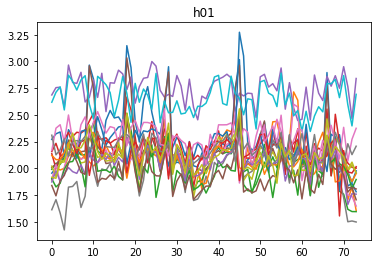

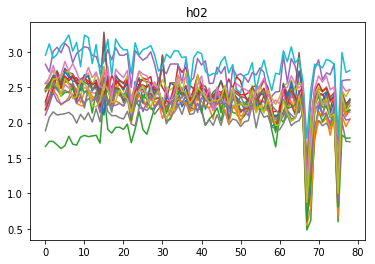

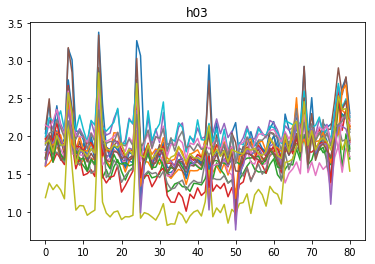

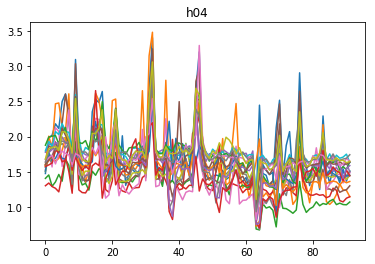

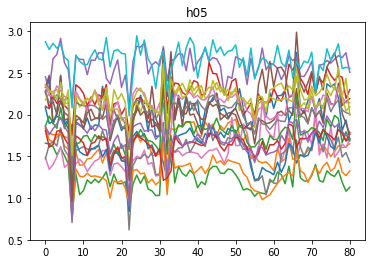

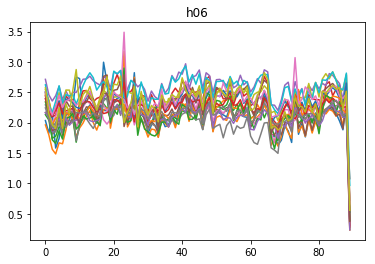

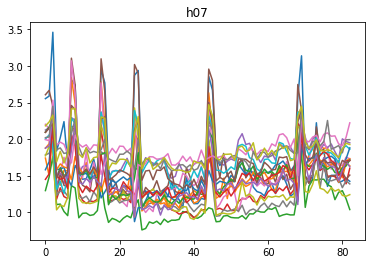

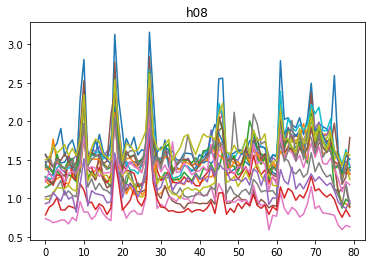

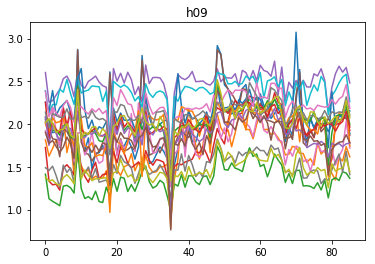

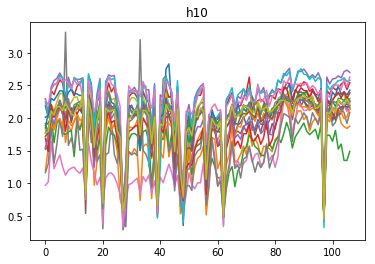

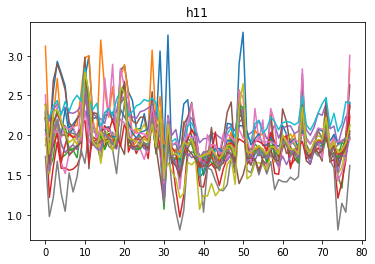

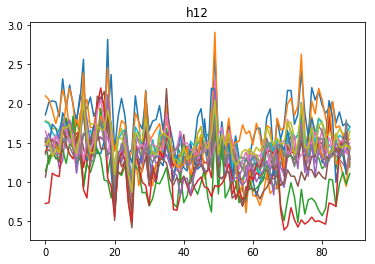

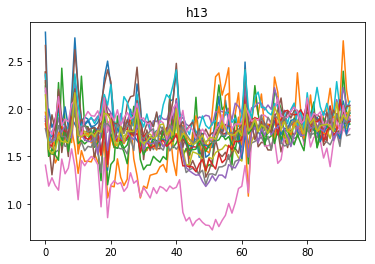

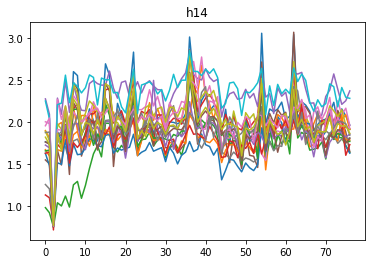

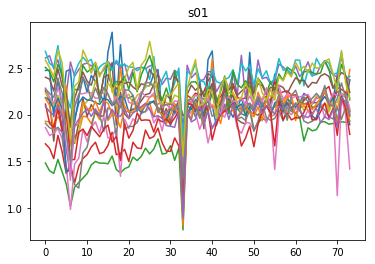

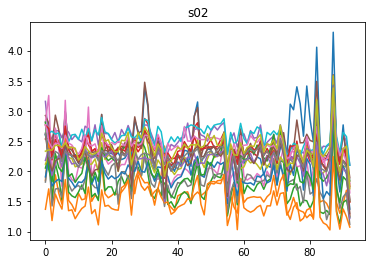

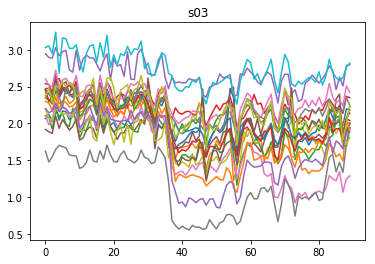

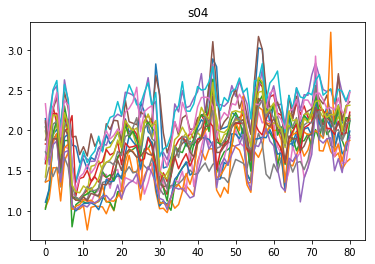

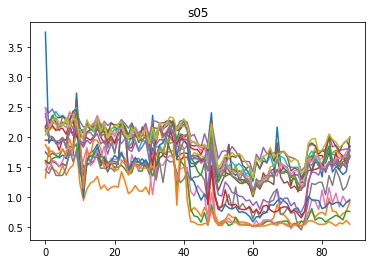

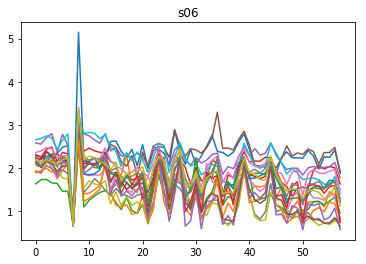

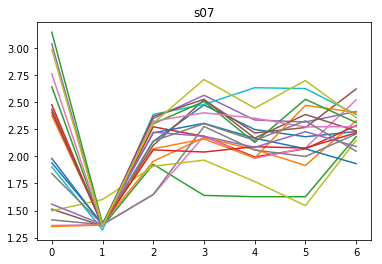

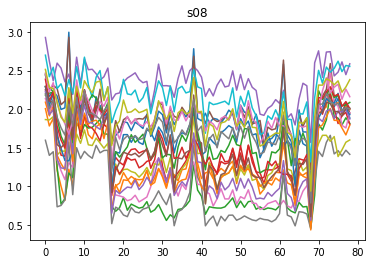

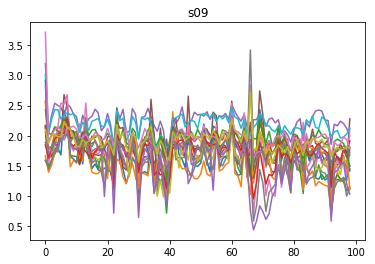

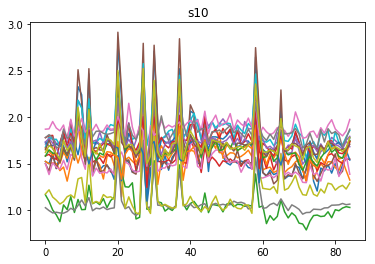

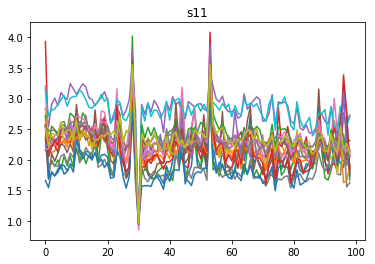

In [8]:
for subject in df_mean.columns:
    plt.figure()
    for i in range(19):
        plt.plot(res_ch[subject][f"{i}"])
        plt.title(subject)

In [9]:
df_mean_hc = df_mean.T.loc[list(filter(lambda x: x.startswith("h"), df_mean.columns))]
df_mean_sz = df_mean.T.loc[list(filter(lambda x: x.startswith("s"), df_mean.columns))]

df_mean_hc_std = df_std.T.loc[list(filter(lambda x: x.startswith("h"), df_std.columns))]
df_mean_sz_std = df_std.T.loc[list(filter(lambda x: x.startswith("s"), df_std.columns))]

<Figure size 432x288 with 0 Axes>

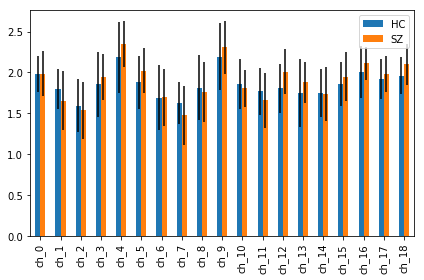

In [10]:
df_mean_concat = pd.concat([df_mean_hc.mean(), df_mean_sz.mean()], axis=1)
df_mean_concat.columns = ["HC", "SZ"]

#df_mean_std_concat = pd.concat([df_mean_hc_std.mean(), df_mean_sz_std.mean()], axis=1)
df_mean_std_concat = pd.concat([df_mean_hc.std(), df_mean_sz.std()], axis=1)
df_mean_std_concat.columns = ["HC", "SZ"]

plt.figure()
df_mean_concat.plot(kind="bar", yerr=df_mean_std_concat)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

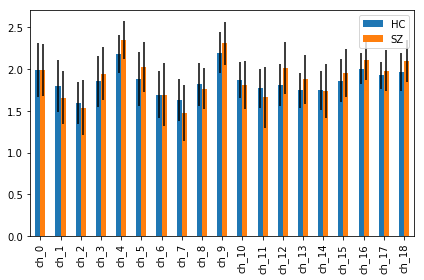

In [11]:
df_median_concat = pd.concat([df_mean_hc.median(), df_mean_sz.median()], axis=1)
df_median_concat.columns = ["HC", "SZ"]

df_median_std_concat = pd.concat([df_mean_hc_std.median(), df_mean_sz_std.median()], axis=1)
df_median_std_concat.columns = ["HC", "SZ"]

plt.figure()
df_mean_concat.plot(kind="bar", yerr=df_median_std_concat)
plt.tight_layout()

In [12]:
# HC mean
df_mean.T.loc[list(filter(lambda x: x.startswith("h"), df_mean.columns))].describe()

,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17,ch_18
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.984693,1.795044,1.593845,1.854673,2.183574,1.880639,1.694132,1.628248,1.815250,2.192891,1.863752,1.769507,1.804973,1.744577,1.748379,1.860819,2.005582,1.923821,1.959492
std,0.217824,0.246846,0.323839,0.394062,0.434805,0.326280,0.396983,0.256316,0.398051,0.411352,0.305014,0.285922,0.301739,0.414748,0.289213,0.266244,0.316116,0.242300,0.227300
min,1.653769,1.410751,1.058109,1.301411,1.334734,1.289106,0.903779,1.239767,1.293089,1.518509,1.419431,1.324007,1.002133,0.957279,1.176258,1.250882,1.433254,1.386997,1.506614
25%,1.803638,1.643293,1.350782,1.515626,1.831214,1.688778,1.445729,1.508763,1.481882,1.870322,1.627566,1.533388,1.735986,1.499811,1.632815,1.763257,1.860861,1.797474,1.821590
50%,2.005226,1.707953,1.572928,1.782496,2.231874,1.930722,1.622793,1.574090,1.771702,2.203949,1.797768,1.800787,1.826290,1.815163,1.808945,1.868884,2.015431,1.952149,1.957427
75%,2.094447,2.013911,1.820787,2.206275,2.563806,2.092086,2.052045,1.823570,2.106783,2.514991,2.105422,1.950716,1.983682,1.988009,1.892101,1.940830,2.229150,2.102071,2.103480
max,2.409302,2.210132,2.112471,2.435405,2.740533,2.460347,2.268789,2.031247,2.447331,2.840497,2.315319,2.167130,2.253463,2.369002,2.189152,2.315852,2.481005,2.286214,2.349103


In [13]:
# SZ mean
df_mean.T.loc[list(filter(lambda x: x.startswith("s"), df_mean.columns))].describe()

,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17,ch_18
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.987253,1.655059,1.535897,1.944802,2.347105,2.021930,1.694746,1.476340,1.765916,2.306065,1.805090,1.662654,2.010783,1.878447,1.736871,1.949507,2.110823,1.981736,2.098458
std,0.280110,0.359961,0.343084,0.282422,0.285912,0.275262,0.347267,0.361902,0.365449,0.319451,0.224537,0.335771,0.271902,0.255544,0.328141,0.301380,0.203588,0.219253,0.249943
min,1.613394,1.001887,1.057880,1.496128,1.822260,1.542158,1.127859,0.916280,1.192008,1.814648,1.314644,1.075897,1.677255,1.545002,1.285531,1.472029,1.815047,1.706435,1.726897
25%,1.773858,1.472621,1.202940,1.732314,2.260245,1.863415,1.559141,1.211905,1.512238,2.185222,1.683947,1.421244,1.791398,1.733794,1.518803,1.755675,1.945301,1.833564,1.926954
50%,2.005342,1.587729,1.659649,1.943663,2.339808,2.085056,1.648878,1.495332,1.797295,2.247743,1.798808,1.644951,1.963090,1.835451,1.634144,1.922067,2.117695,1.874990,1.974866
75%,2.157477,1.939312,1.767588,2.148651,2.497622,2.191824,1.871992,1.842132,2.033951,2.522144,1.978391,1.898706,2.233900,2.023529,1.975593,2.220802,2.280043,2.165443,2.357155
max,2.419974,2.231657,1.984301,2.388628,2.835018,2.455944,2.326560,1.944878,2.266413,2.797958,2.082884,2.168093,2.425550,2.347641,2.313250,2.304267,2.437189,2.348886,2.408735


In [14]:
df_std.T.loc[list(filter(lambda x: x.startswith("h"), df_std.columns))].describe()

,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17,ch_18
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.360525,0.319742,0.256592,0.286273,0.234900,0.353042,0.290590,0.271928,0.273996,0.248430,0.248010,0.241052,0.251769,0.237167,0.240804,0.255334,0.205611,0.184515,0.229850
std,0.098946,0.096185,0.065287,0.087425,0.095041,0.084268,0.094154,0.095508,0.102553,0.105659,0.099232,0.083953,0.072817,0.099193,0.083918,0.074678,0.100864,0.083230,0.079270
min,0.213687,0.171455,0.161286,0.145185,0.122959,0.262306,0.180240,0.143112,0.139587,0.144911,0.110361,0.122323,0.144232,0.130427,0.119890,0.122692,0.109545,0.093963,0.122469
25%,0.295811,0.260295,0.212437,0.244506,0.168641,0.286977,0.211453,0.221518,0.215390,0.180363,0.202231,0.186453,0.209296,0.166864,0.192676,0.215142,0.145536,0.143402,0.168321
50%,0.325234,0.309408,0.251174,0.303847,0.226996,0.322525,0.280990,0.252927,0.252987,0.245859,0.216306,0.235478,0.252755,0.206971,0.233379,0.258250,0.181822,0.165602,0.226301
75%,0.421355,0.374911,0.304916,0.325163,0.274636,0.431604,0.357432,0.302715,0.338519,0.260762,0.280745,0.287105,0.281344,0.276270,0.275534,0.287029,0.227157,0.196201,0.269135
max,0.562922,0.517383,0.374169,0.475871,0.504671,0.516252,0.487012,0.530212,0.476337,0.572963,0.489400,0.415289,0.428158,0.475657,0.470357,0.434529,0.508633,0.428172,0.427879


In [15]:
df_std.T.loc[list(filter(lambda x: x.startswith("s"), df_std.columns))].describe()

,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17,ch_18
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.315976,0.305354,0.342456,0.294510,0.258040,0.306227,0.356930,0.310848,0.267810,0.267188,0.287613,0.342433,0.297809,0.304095,0.343664,0.302910,0.253735,0.246015,0.277706
std,0.084204,0.078058,0.107041,0.075246,0.097743,0.080097,0.098199,0.088674,0.081401,0.102145,0.110434,0.132705,0.104734,0.123105,0.132770,0.112585,0.096755,0.082405,0.095602
min,0.193204,0.171041,0.161041,0.155705,0.131311,0.168859,0.152030,0.134891,0.160348,0.147344,0.120939,0.125674,0.171277,0.128274,0.134190,0.139265,0.090108,0.118272,0.161869
25%,0.275170,0.277661,0.299784,0.236480,0.187795,0.273929,0.318636,0.268245,0.225922,0.185752,0.227379,0.268236,0.205302,0.221573,0.262577,0.227647,0.184119,0.184690,0.213798
50%,0.315181,0.315428,0.330125,0.314063,0.231189,0.302417,0.379449,0.331986,0.248996,0.253066,0.285163,0.364410,0.307972,0.293158,0.323174,0.290103,0.246390,0.247737,0.253569
75%,0.341205,0.362611,0.397779,0.348638,0.312584,0.354945,0.408374,0.363295,0.278689,0.312742,0.329668,0.415959,0.376718,0.369271,0.432538,0.353004,0.332045,0.305203,0.310919
max,0.477464,0.393102,0.514234,0.384551,0.462828,0.444401,0.504167,0.444748,0.474648,0.441841,0.541200,0.580015,0.489334,0.537685,0.566442,0.552374,0.396885,0.398119,0.481329
